In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator,img_to_array

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\train"

test_dir = r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\test"

In [3]:
image_size=(64,64)

batch = 32


In [4]:
train_dataset = ImageDataGenerator(
    rescale=1.0/255.0,        #Normalize pixel values
    rotation_range=20,        #Random rotation
    width_shift_range=0.2,     # Horizontal Shift
    height_shift_range=0.2,    #Vertical shift
    shear_range=0.2,           #shear transformation
    zoom_range=0.2,             #zoom in/out
    horizontal_flip=True       #Flip the image horizontally
)

In [5]:
train_img = train_dataset.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size =batch,
    class_mode="categorical"     # multi_class Classification
)

Found 2647 images belonging to 3 classes.


In [6]:
test_dataset = ImageDataGenerator(rescale=1/255.0)

In [7]:
test_img = test_dataset.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch,
    class_mode="categorical"
)

Found 382 images belonging to 3 classes.


In [8]:
train_img.class_indices

{'Anthracnose': 0, 'fruit_fly': 1, 'healthy_guava': 2}

In [9]:
classes = {val:key for key , val in train_img.class_indices.items()}

In [10]:
classes

{0: 'Anthracnose', 1: 'fruit_fly', 2: 'healthy_guava'}

In [11]:
model = Sequential([
    Flatten(input_shape = (64,64,3)),
    Dense(120,activation="relu"),
    Dense(64,activation="relu"),
    Dense(3,activation="softmax")
])

In [12]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(train_img,epochs=30,validation_data=test_img)

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.3958 - loss: 1.7953 - val_accuracy: 0.4974 - val_loss: 1.2378
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.5176 - loss: 1.0402 - val_accuracy: 0.6230 - val_loss: 0.8659
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.6065 - loss: 0.8428 - val_accuracy: 0.6178 - val_loss: 0.8457
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6436 - loss: 0.7856 - val_accuracy: 0.6832 - val_loss: 0.6850
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.6569 - loss: 0.7279 - val_accuracy: 0.7461 - val_loss: 0.5998
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.6624 - loss: 0.7246 - val_accuracy: 0.7120 - val_loss: 0.6583
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6983 - loss: 0.6507 - val_accuracy: 0.7435 - val_loss: 0.5731
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7029 - loss: 0.6678 - val_accuracy: 0.6335 - val

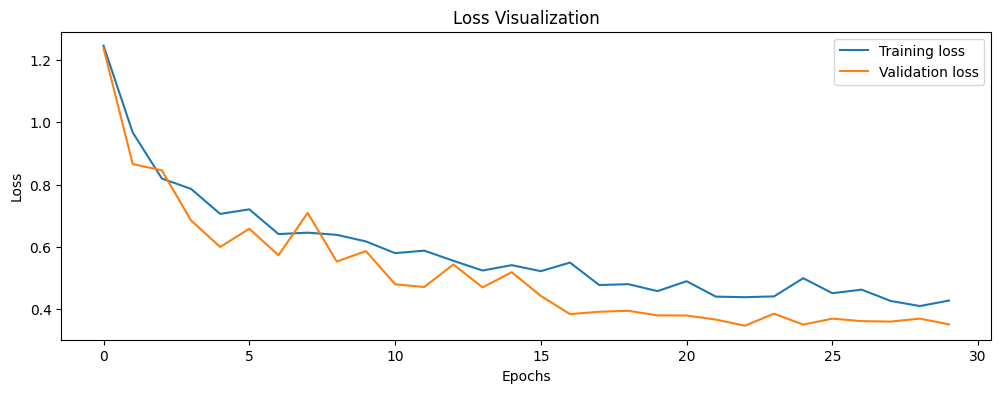

In [14]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label="Training loss")
plt.plot(model.history.history["val_loss"],label="Validation loss")
plt.title("Loss Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

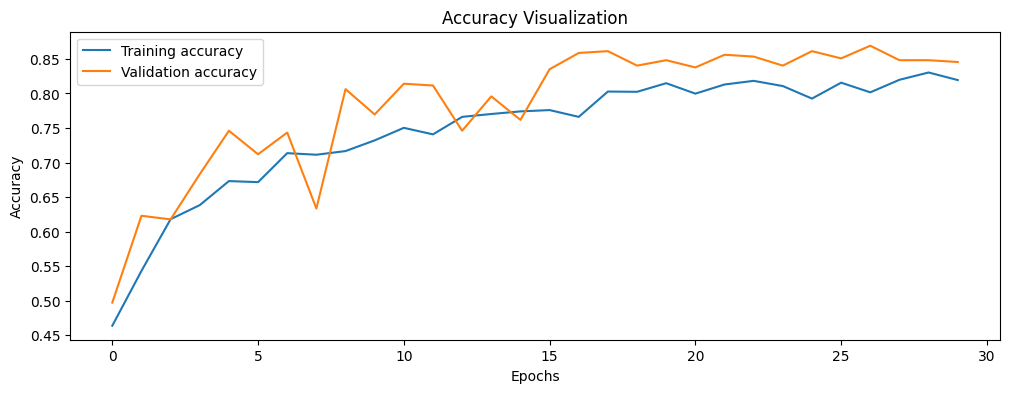

In [15]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["accuracy"],label="Training accuracy")
plt.plot(model.history.history["val_accuracy"],label="Validation accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [16]:
def image_predictor(img_path):
    img = load_img(img_path,target_size=(64,64))
    img_arr = img_to_array(img)
    img_norm = img_arr / 255.0
    img_flatten =  np.expand_dims(img_norm,axis=0)
    pred = model.predict(img_flatten)
    predicted_class = classes[np.argmax(pred[0])]
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


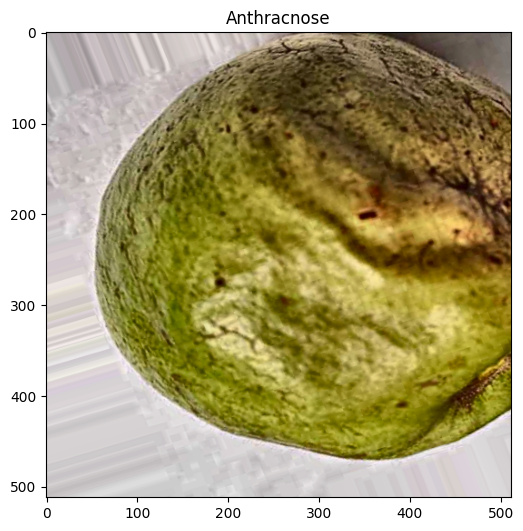

In [36]:
plt.figure(figsize=(6,7))
plt.title(image_predictor(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\fruit_fly\1_unsharp_clahe_augmented_7.png"))
plt.imshow(load_img(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\fruit_fly\1_unsharp_clahe_augmented_7.png"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


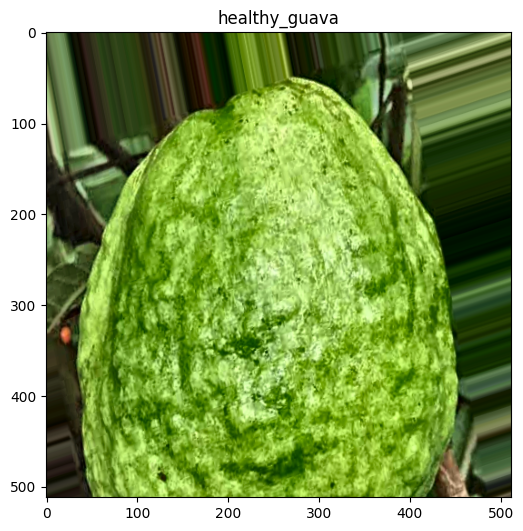

In [35]:
plt.figure(figsize=(6,7))
plt.title(image_predictor(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\healthy_guava\2_unsharp_clahe_augmented_1.png"))
plt.imshow(load_img(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\healthy_guava\2_unsharp_clahe_augmented_1.png"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


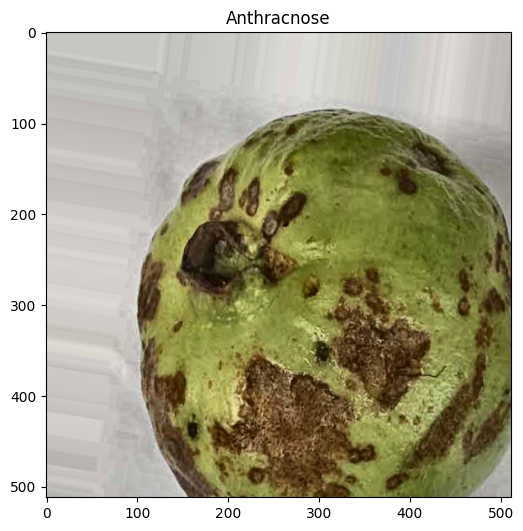

In [33]:
plt.figure(figsize=(6,7))
plt.title(image_predictor(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\Anthracnose\1_unsharp_clahe_augmented_0.png"))
plt.imshow(load_img(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\Anthracnose\1_unsharp_clahe_augmented_0.png"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


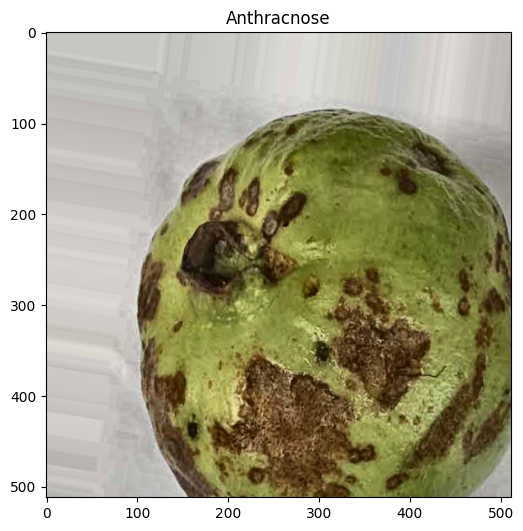

In [32]:
plt.figure(figsize=(6,7))
plt.title(image_predictor(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\Anthracnose\1_unsharp_clahe_augmented_0.png"))
plt.imshow(load_img(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\Anthracnose\1_unsharp_clahe_augmented_0.png"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


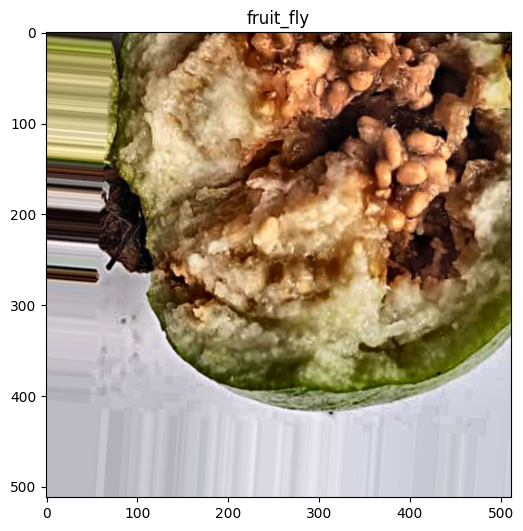

In [31]:
plt.figure(figsize=(6,7))
plt.title(image_predictor(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\fruit_fly\20230622_153316_unsharp_clahe_augmented_4.png"))
plt.imshow(load_img(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\fruit_fly\20230622_153316_unsharp_clahe_augmented_4.png"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


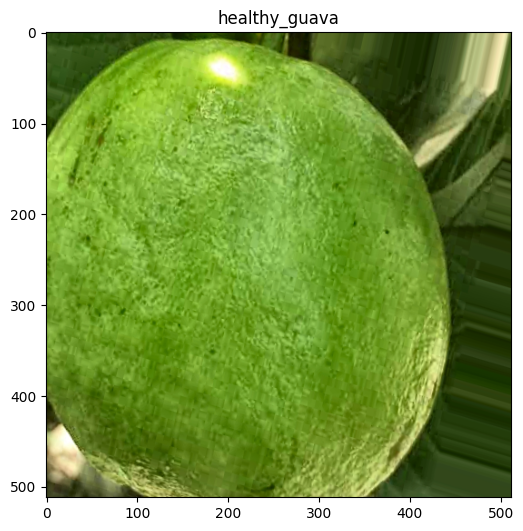

In [29]:
plt.figure(figsize=(6,7))
plt.title(image_predictor(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\healthy_guava\22_unsharp_clahe_augmented_6.png"))
plt.imshow(load_img(r"C:\Users\DELL\Desktop\AI\GuavaDiseaseDataset\GuavaDiseaseDataset\val\healthy_guava\22_unsharp_clahe_augmented_6.png"))
plt.show()